In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats.mstats import pearsonr as corr
import matplotlib
import matplotlib.pyplot as plt

**Reading data**

In [3]:
data = pd.read_csv('data.tsv', sep='\t')

In [4]:
data.head(5)

,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


In [5]:
data.columns = ['NAME', 'TYPE', 'SAT', 'ACCEPTED_PCT', 'PRICE', 'TOP_10', 'PHD_PCT', 'GRADUATED_PCT']

In [6]:
lib_arts = data[data.TYPE == 'Lib Arts'].drop('TYPE', axis=1)
univ = data[data.TYPE == 'Univ'].drop('TYPE', axis=1)

In [7]:
def z_transform(sample):
    return (sample - sample.mean()) / sample.std()

def filter_outliers(df):
    for col in df.columns:
        if col not in ['TYPE', 'NAME']:
            z_transformed = abs(z_transform(df[col]))
            df = df[z_transformed <= 3]
    return df

def print_correlations(data):
    for col1 in data.columns:
        for col2 in data.columns:
            if col1 != col2 and col1 > col2 and col1 not in ['TYPE', 'NAME'] and col2 not in ['TYPE', 'NAME']:
                if abs(corr(data[col1], data[col2])[0]) > 0.5:
                    print('Pearson correlation coefficient between {} and {}: {} '
                          .format(col1, col2, corr(data[col1], data[col2])[0]))
                    plt.scatter(data[col1], data[col2])
                    plt.title('{} & {}'.format(col1, col2))
                    plt.show()

def check_is_normal(sample, p):
    p_value = stats.shapiro(sample)[1]
    return p_value > p, p_value

    
def describe_data(data, p):
    cols = [col for col in data.columns if col not in ['TYPE', 'NAME']]
    for col in cols:
            is_normal, p_value = check_is_normal(data[col], p)
            if is_normal:
                print('{} : distributed normally with p-value = {} > {}\n'.format(col, p_value, p))
            else:
                print('{} : not distributed normally (p-value = {} < {})\n'.format(col, p_value, p))
            stats.probplot(data[col], plot=plt)
            plt.title('QQ-plot for {}'.format(col))
            plt.show()

In [8]:
univ = filter_outliers(univ)
lib_arts = filter_outliers(lib_arts)

**General statisitics**

In [9]:
univ.describe()

,SAT,ACCEPTED_PCT,PRICE,TOP_10,PHD_PCT,GRADUATED_PCT
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1264.869565,34.739130,35684.739130,81.478261,94.173913,83.043478
std,75.088617,14.197367,12122.180501,11.927316,5.749721,9.082842
min,1109.000000,17.000000,19365.000000,52.000000,79.000000,61.000000
25%,1221.500000,24.000000,25465.500000,77.000000,92.000000,76.500000
50%,1280.000000,30.000000,35804.000000,85.000000,96.000000,86.000000
75%,1318.500000,44.000000,42881.000000,90.000000,98.500000,90.000000
max,1370.000000,64.000000,61921.000000,96.000000,100.000000,95.000000


In [10]:
lib_arts.describe()

,SAT,ACCEPTED_PCT,PRICE,TOP_10,PHD_PCT,GRADUATED_PCT
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,1256.640000,40.560000,21755.560000,67.240000,88.24000,84.120000
std,43.673867,12.516922,3455.726444,10.802315,6.66008,6.091798
min,1170.000000,22.000000,17520.000000,47.000000,75.00000,72.000000
25%,1230.000000,33.000000,18872.000000,61.000000,82.00000,80.000000
50%,1255.000000,38.000000,20377.000000,68.000000,90.00000,85.000000
75%,1290.000000,49.000000,24718.000000,76.000000,93.00000,88.000000
max,1336.000000,67.000000,27879.000000,86.000000,98.00000,93.000000


SAT : distributed normally with p-value = 0.371493935585022 > 0.05



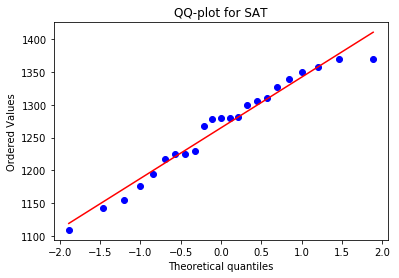

ACCEPTED_PCT : distributed normally with p-value = 0.07479183375835419 > 0.05



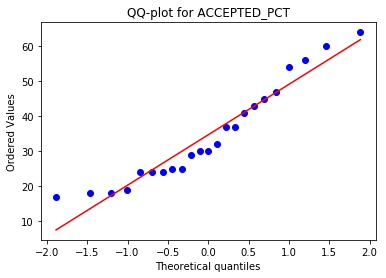

PRICE : distributed normally with p-value = 0.2785978615283966 > 0.05



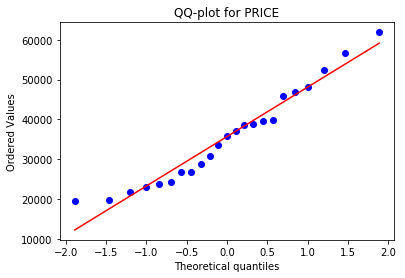

TOP_10 : not distributed normally (p-value = 0.011292506009340286 < 0.05)



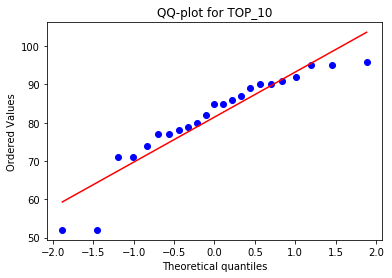

PHD_PCT : not distributed normally (p-value = 0.005495925899595022 < 0.05)



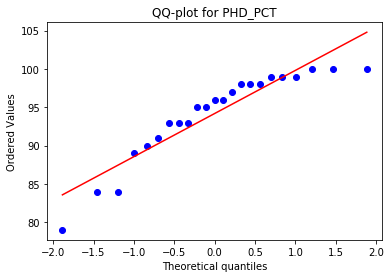

GRADUATED_PCT : not distributed normally (p-value = 0.048941608518362045 < 0.05)



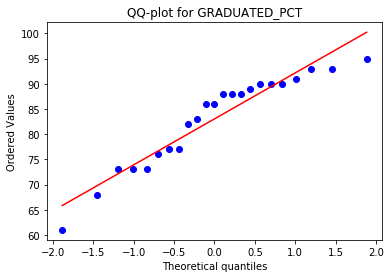

In [11]:
describe_data(univ, p=0.05)

SAT : distributed normally with p-value = 0.8171436190605164 > 0.05



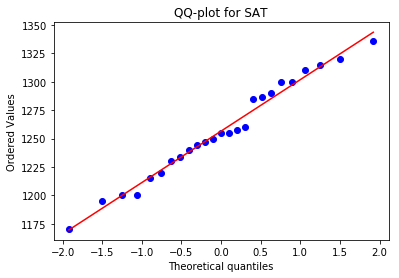

ACCEPTED_PCT : distributed normally with p-value = 0.33980199694633484 > 0.05



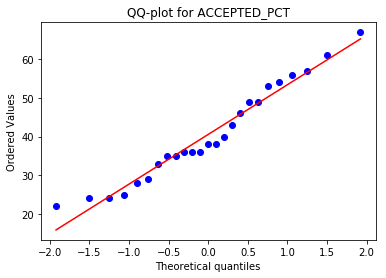

PRICE : not distributed normally (p-value = 0.026016557589173317 < 0.05)



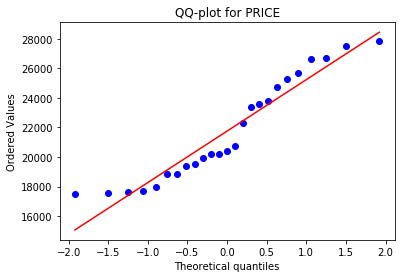

TOP_10 : distributed normally with p-value = 0.6672059297561646 > 0.05



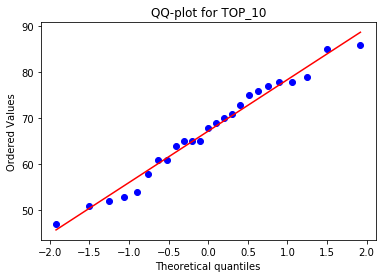

PHD_PCT : distributed normally with p-value = 0.2353450208902359 > 0.05



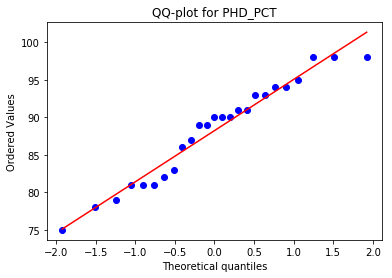

GRADUATED_PCT : distributed normally with p-value = 0.3041570782661438 > 0.05



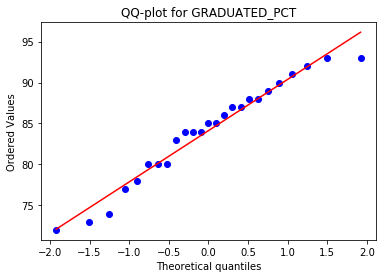

In [12]:
describe_data(lib_arts, p=0.05)

SAT : distributed normally with p-value = 0.9981370568275452 > 0.05



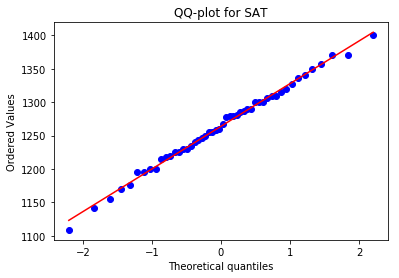

ACCEPTED_PCT : distributed normally with p-value = 0.07482080161571503 > 0.05



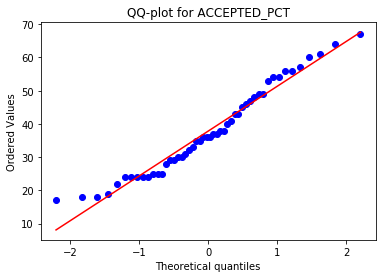

PRICE : not distributed normally (p-value = 4.333724845650977e-08 < 0.05)



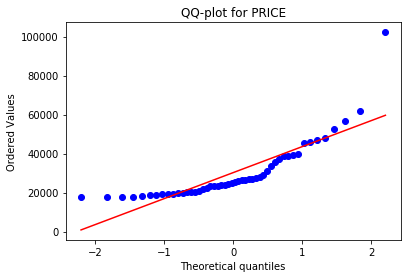

TOP_10 : distributed normally with p-value = 0.18322163820266724 > 0.05



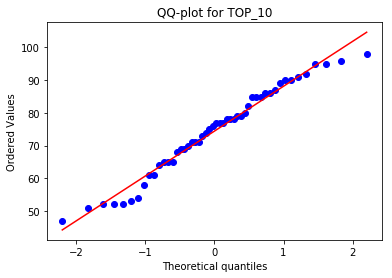

PHD_PCT : not distributed normally (p-value = 7.882166391937062e-05 < 0.05)



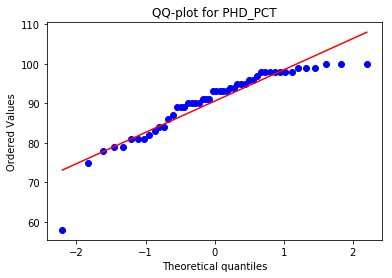

GRADUATED_PCT : not distributed normally (p-value = 0.012669116258621216 < 0.05)



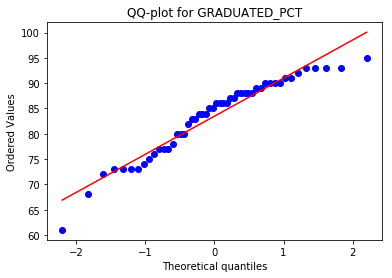

In [13]:
describe_data(data, p=0.05)

**Correlations between the parameters**

Universities:

Pearson correlation coefficient between SAT and ACCEPTED_PCT: -0.6584472318519367 


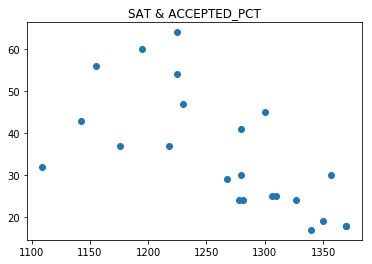

Pearson correlation coefficient between SAT and PRICE: 0.6902538245503718 


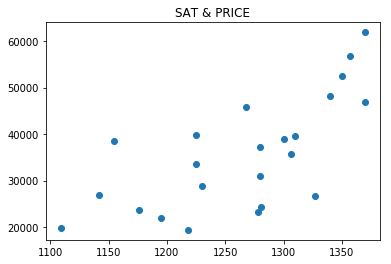

Pearson correlation coefficient between SAT and GRADUATED_PCT: 0.7761145027603067 


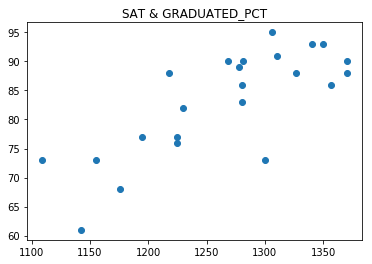

Pearson correlation coefficient between TOP_10 and ACCEPTED_PCT: -0.7229099159749491 


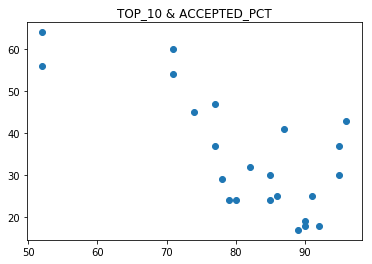

Pearson correlation coefficient between GRADUATED_PCT and ACCEPTED_PCT: -0.6788052714745821 


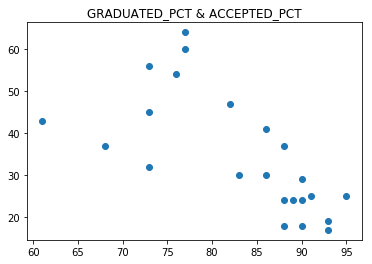

In [14]:
print_correlations(univ)

Liberal art schools:

Pearson correlation coefficient between SAT and ACCEPTED_PCT: -0.6168462975215037 


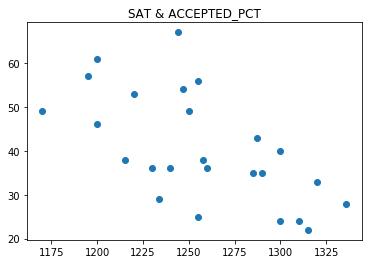

Pearson correlation coefficient between TOP_10 and SAT: 0.7463030602259074 


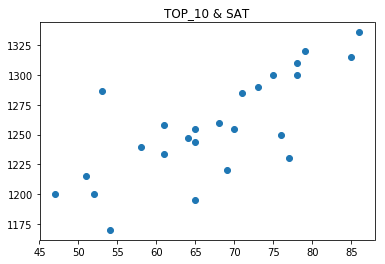

Pearson correlation coefficient between GRADUATED_PCT and ACCEPTED_PCT: -0.5544658970685749 


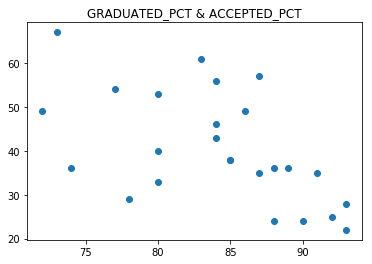

In [15]:
print_correlations(lib_arts)

Whole data:

Pearson correlation coefficient between SAT and ACCEPTED_PCT: -0.6067533652159426 


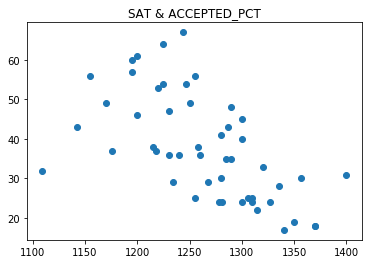

Pearson correlation coefficient between SAT and PRICE: 0.5794226393202592 


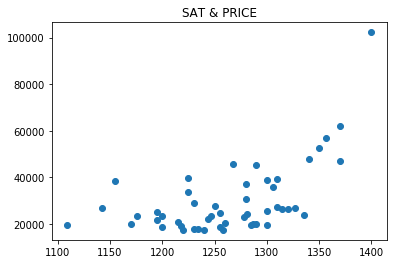

Pearson correlation coefficient between SAT and GRADUATED_PCT: 0.5691259574656619 


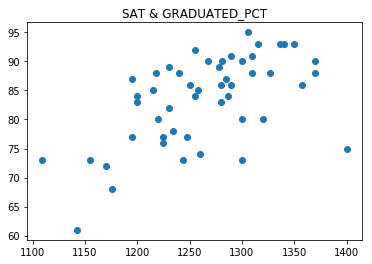

Pearson correlation coefficient between TOP_10 and SAT: 0.5092596789577503 


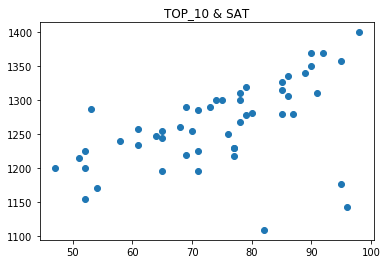

Pearson correlation coefficient between TOP_10 and ACCEPTED_PCT: -0.6163283973531873 


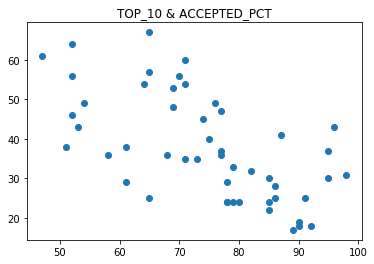

Pearson correlation coefficient between TOP_10 and PRICE: 0.5099481790866459 


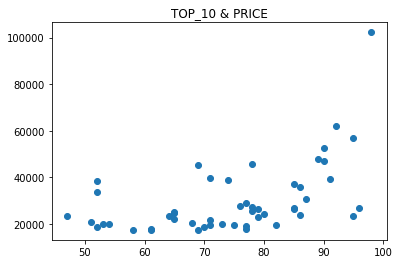

Pearson correlation coefficient between GRADUATED_PCT and ACCEPTED_PCT: -0.5622106972328388 


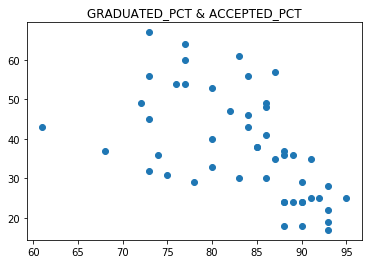

In [16]:
print_correlations(data)